In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import joblib

from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from mapchiral import mapchiral

from tqdm import tqdm
tqdm.pandas()

import tmap as tm
from faerun import Faerun

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams.update({'font.size': 10})

#### Single Sequence Runs: Generations

In [2]:
def generations_plot(query, second_query, order=['0', '1', '2']):
    csv_files = [filename for filename in os.listdir('results/generations/') if f'{query}_MAP4' in filename and second_query not in filename and f'{query}_{query}' not in filename and filename.endswith('.csv')]
    csv_files = sorted(csv_files, key=lambda x: order.index(x.split('_')[3].split('.')[0]))

    fig, ax = plt.subplots(figsize=(3, 2.25))
    colors = ['#648FFF', '#DC267F', '#FFB000']
    for i, csv_file in enumerate(csv_files):
        df = pd.read_csv(f'results/generations/{csv_file}')
        ax.plot(df['generation'], df['best_score'], label=csv_file.split('_')[3].split('.')[0], color=colors[i], linewidth=2)

    ax.set_xlabel('Generation')
    ax.set_ylabel('Best Score')
    ax.set_xscale('log')
    ax.set_ylim(0, 1)
    ax.set_xticks([10**i for i in range(1, 5)])

    plt.savefig(f'plots/{query}_MAP4_generations.png', dpi=1200, bbox_inches='tight')

EB9

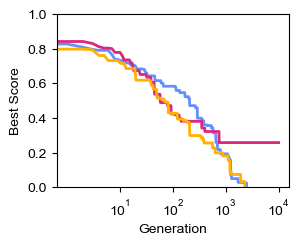

In [3]:
generations_plot('EB9', 'Oncocin', order=['0', '2', '1'])

Oncocin

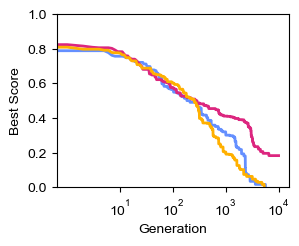

In [4]:
generations_plot('Oncocin', 'EB9', order=['1', '0', '2'])

Gramicidin S

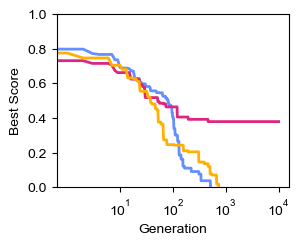

In [5]:
generations_plot('GramicidinS', 'PolymyxinB2', order=['0', '1', '2'])

Polymyxin B2

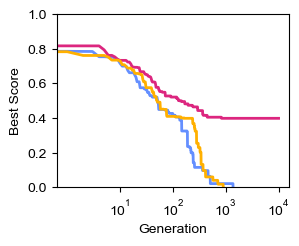

In [6]:
generations_plot('PolymyxinB2', 'GramicidinS', order=['1', '0', '2'])

Cathelicidin BF

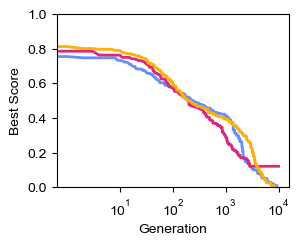

In [7]:
generations_plot('CathelicidinBF', 'CirculinD', order=['0', '1', '2'])

Circulin D

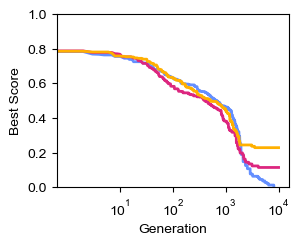

In [8]:
generations_plot('CirculinD', 'CathelicidinBF', order=['0', '1', '2'])

#### MXFP

In [9]:
def generations_plot_mxfp(query):
    csv_files = [filename for filename in os.listdir('results/generations/') if f'{query}_MXFP' in filename and filename.endswith('.csv')]
    csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[3].split('.')[0]))

    fig, ax = plt.subplots(figsize=(3, 2.25))

    colors = ['#648FFF', '#DC267F', '#FFB000']

    for i, csv_file in enumerate(csv_files):
        df = pd.read_csv(f'results/generations/{csv_file}')
        ax.plot(df['generation'], df['best_score'], label=csv_file.split('_')[3].split('.')[0], color=colors[i], linewidth=2)

    ax.set_xlabel('Generation')
    ax.set_ylabel('Best Score')
    ax.set_xscale('log')
    ax.set_ylim(0, 600)
    ax.set_xticks([10**i for i in range(1, 5)])

    plt.savefig(f'plots/{query}_MXFP_generations.png', dpi=1200, bbox_inches='tight')

Cyclosporin

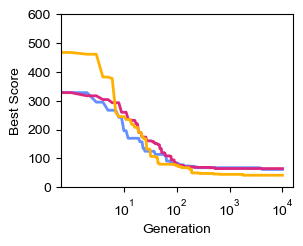

In [10]:
generations_plot_mxfp('Cyclosporin')

Valinomycin

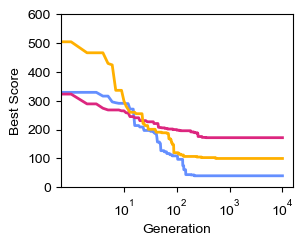

In [11]:
generations_plot_mxfp('Valinomycin')

#### Single Sequence Runs: Summarized

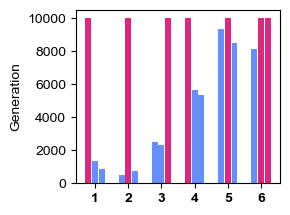

In [12]:
csv_files = [filename for filename in os.listdir('results/generations/') if filename.split('_')[2] == 'MAP4' and filename.endswith('.csv')]
csv_files = [filename for filename in csv_files if 'aConotoxinGIA' not in filename and 'EpothiloneA' not in filename and 'aCyclodextrin' not in filename and 'EB9Oncocin' not in filename and 'GramicidinPolymyxin' not in filename and 'CathelicidinCirculin' not in filename]
csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[3].split('.')[0]))
csv_files = sorted(csv_files, key=lambda x: x.split('_')[1])

csv_files_sorted = []
sorting_order = ['PolymyxinB2', 'GramicidinS', 'EB9', 'Oncocin', 'CathelicidinBF', 'CirculinD']

for order in sorting_order:
    csv_files_sorted += [filename for filename in csv_files if order in filename]

runs = np.zeros(len(csv_files_sorted))
for i, csv_file in enumerate(csv_files_sorted):
    df = pd.read_csv(f'results/generations/{csv_file}')
    if len(df) == 10000:
        runs[i] = 10000
    else:
        runs[i] = len(df) - 4
    
runs = runs.reshape((6, 3))
n_groups = runs.shape[0]
n_bars = runs.shape[1]
group_positions = np.arange(n_groups)
bar_width = 0.2
colors = np.array([['#DC267F' if value == 10000 else '#648FFF' for value in row] for row in runs])

plt.figure(figsize=(3, 2.25))
for i in range(n_bars):
    plt.bar(group_positions + i*bar_width , runs[:, i], color=colors[:, i], width=bar_width-0.02)

plt.ylabel('Generation')
plt.xticks(group_positions + bar_width, ['1', '2', '3', '4', '5', '6'], weight='bold')

plt.tight_layout()
plt.savefig('plots/AllQueries_generations.png', dpi=1200, bbox_inches='tight')

#### Single Sequence Runs: Number of Sequences

In [13]:
csv_files = [filename for filename in os.listdir('results/generations/') if filename.split('_')[2] == 'MAP4' and filename.endswith('.csv')]
csv_files = [filename for filename in csv_files if 'aConotoxinGIA' not in filename and 'EpothiloneA' not in filename and 'aCyclodextrin' not in filename and 'EB9Oncocin' not in filename and 'GramicidinPolymyxin' not in filename and 'CathelicidinCirculin' not in filename]
csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[3].split('.')[0]))
csv_files = sorted(csv_files, key=lambda x: x.split('_')[1])

csv_files_sorted = []
sorting_order = ['PolymyxinB2', 'GramicidinS', 'EB9', 'Oncocin', 'CathelicidinBF', 'CirculinD']

for order in sorting_order:
    csv_files_sorted += [filename for filename in csv_files if order in filename]

runs = np.zeros(len(csv_files_sorted))
for i, csv_file in enumerate(csv_files_sorted):
    df = pd.read_csv(f'results/{csv_file}')
    df = df.dropna()
    runs[i] = len(df)

runs = runs.reshape((6, 3))
runs

array([[ 7877.,  6362.,  6934.],
       [ 4119.,  4142.,  5438.],
       [20998., 20377.,  7160.],
       [55462., 39835., 46591.],
       [88738., 31301., 86265.],
       [73535., 37526., 33738.]])

#### Single Sequence Runs: Percent of Sequences below Threshold

In [ ]:
csv_files = [filename for filename in os.listdir('results/generations/') if filename.split('_')[2] == 'MAP4' and filename.endswith('.csv')]
csv_files = [filename for filename in csv_files if 'aConotoxinGIA' not in filename and 'EpothiloneA' not in filename and 'aCyclodextrin' not in filename and 'EB9Oncocin' not in filename and 'GramicidinPolymyxin' not in filename and 'CathelicidinCirculin' not in filename]
csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[3].split('.')[0]))
csv_files = sorted(csv_files, key=lambda x: x.split('_')[1])

csv_files_sorted = []
sorting_order = ['PolymyxinB2', 'GramicidinS', 'EB9', 'Oncocin', 'CathelicidinBF', 'CirculinD']

for order in sorting_order:
    csv_files_sorted += [filename for filename in csv_files if order in filename]

runs = np.zeros(len(csv_files_sorted))
for i, csv_file in enumerate(csv_files_sorted):
    df = pd.read_csv(f'results/{csv_file}')
    df = df.dropna()
    df_half = df[df['dist'] < 0.5]
    runs[i] = len(df_half)/len(df)

runs = runs.reshape((6, 3))
runs

#### Single Sequence Runs: Number of Sequences without Stereochemistry

In [14]:
csv_files = [filename for filename in os.listdir('results/generations/') if filename.split('_')[2] == 'MAP4' and filename.endswith('.csv')]
csv_files = [filename for filename in csv_files if 'aConotoxinGIA' not in filename and 'EpothiloneA' not in filename and 'aCyclodextrin' not in filename and 'EB9Oncocin' not in filename and 'GramicidinPolymyxin' not in filename and 'CathelicidinCirculin' not in filename]
csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[3].split('.')[0]))
csv_files = sorted(csv_files, key=lambda x: x.split('_')[1])

csv_files_sorted = []
sorting_order = ['PolymyxinB2', 'GramicidinS', 'EB9', 'Oncocin', 'CathelicidinBF', 'CirculinD']

for order in sorting_order:
    csv_files_sorted += [filename for filename in csv_files if order in filename]

runs = np.zeros(len(csv_files_sorted))
for i, csv_file in enumerate(csv_files_sorted):
    df = pd.read_csv(f'results/{csv_file}')
    df = df.dropna()
    df['smiles'] = df['smiles'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x), isomericSmiles=False))
    df_flat = df.drop_duplicates(subset='smiles')
    runs[i] = len(df_flat)

runs = runs.reshape((6, 3))
runs

array([[ 4851.,  4792.,  5123.],
       [ 3384.,  2958.,  4505.],
       [16705., 16333.,  5720.],
       [32698., 27829., 22023.],
       [57367., 20831., 63374.],
       [43550., 23368., 26092.]])

In [15]:
csv_files = [filename for filename in os.listdir('results/generations/') if filename.split('_')[2] == 'MAP4' and filename.endswith('.csv')]
csv_files = [filename for filename in csv_files if 'aConotoxinGIA' not in filename and 'EpothiloneA' not in filename and 'aCyclodextrin' not in filename and 'EB9Oncocin' not in filename and 'GramicidinPolymyxin' not in filename and 'CathelicidinCirculin' not in filename]
csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[3].split('.')[0]))
csv_files = sorted(csv_files, key=lambda x: x.split('_')[1])

csv_files_sorted = []
sorting_order = ['PolymyxinB2', 'GramicidinS', 'EB9', 'Oncocin', 'CathelicidinBF', 'CirculinD']

for order in sorting_order:
    csv_files_sorted += [filename for filename in csv_files if order in filename]

runs = np.zeros(len(csv_files_sorted))
for i, csv_file in enumerate(csv_files_sorted):
    df = pd.read_csv(f'results/{csv_file}')
    df = df.dropna()
    df['smiles'] = df['smiles'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromSmiles(x), isomericSmiles=False))
    df_flat = df.drop_duplicates(subset='smiles')
    df_flat_half = df_flat[df_flat['dist'] < 0.5]
    runs[i] = len(df_flat_half)/len(df_flat)

runs = runs.reshape((6, 3))
runs

array([[0.12904556, 0.66548414, 0.57212571],
       [0.63061466, 0.09263016, 0.76293008],
       [0.31559413, 0.41119207, 0.2798951 ],
       [0.52232552, 0.69603651, 0.65499705],
       [0.80900169, 0.80044165, 0.8332597 ],
       [0.58362801, 0.60621363, 0.5331136 ]])

#### New sequences per generation

In [16]:
def newmols_plot(query, second_query, c1='#648FFF', c2='#DC267F', c3='#FFB000', order=['0', '1', '2']): 
    csv_files = [filename for filename in os.listdir('results/') if f'{query}_MAP4' in filename and second_query not in filename and f'{query}_{query}' not in filename and filename.endswith('.csv')]
    csv_files = sorted(csv_files, key=lambda x: order.index(x.split('_')[3].split('.')[0]))

    # Read data
    df = pd.DataFrame()
    for i, csv_file in enumerate(csv_files):
        df_run = pd.read_csv(f'results/{csv_file}')
        df_run['run'] = i
        df = pd.concat([df, df_run])

    df['generation'] = df['generation'] + 1
    df['generation'].fillna(0, inplace=True)

    df_run0 = df[df['run'] == 0]
    df_run1 = df[df['run'] == 1]
    df_run2 = df[df['run'] == 2]

    # Group by generation and count molecules
    run0_counts = df_run0.groupby('generation').size()
    run1_counts = df_run1.groupby('generation').size()
    run2_counts = df_run2.groupby('generation').size()

    # Calculate cumulative counts
    run0_cumulative_counts = run0_counts.cumsum()
    run1_cumulative_counts = run1_counts.cumsum()
    run2_cumulative_counts = run2_counts.cumsum()

    # Plot data
    fig, ax = plt.subplots(figsize=(3, 2.25))

    ax.plot(run0_cumulative_counts.index, run0_cumulative_counts.values, label='Run 1', color=c1, linewidth=2)
    ax.plot(run1_cumulative_counts.index, run1_cumulative_counts.values, label='Run 2', color=c2, linewidth=2)
    ax.plot(run2_cumulative_counts.index, run2_cumulative_counts.values, label='Run 3', color=c3, linewidth=2)

    ax.set_xlabel('Generation')
    ax.set_ylabel('Cumulative Molecules')

    plt.tight_layout()
    plt.savefig(f'plots/{query}_newmols_cumulative.png', dpi=1200, bbox_inches='tight')

EB9

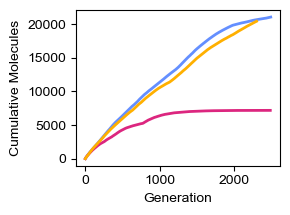

In [17]:
newmols_plot('EB9', 'Oncocin', order=['0', '2', '1'])

Onconcin

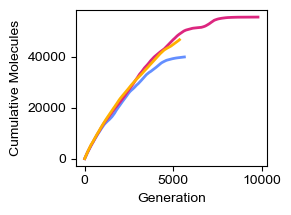

In [18]:
newmols_plot('Oncocin', 'EB9', order=['1', '0', '2'])

Gramicidin S

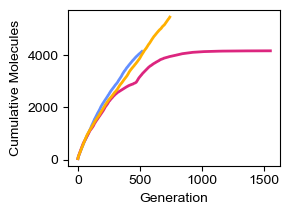

In [19]:
newmols_plot('GramicidinS', 'PolymyxinB2', order=['0', '1', '2'])

Polymyxin B2

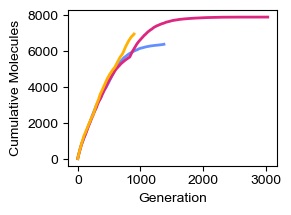

In [20]:
newmols_plot('PolymyxinB2', 'GramicidinS', order=['1', '0', '2'])

Cathelicidin BF

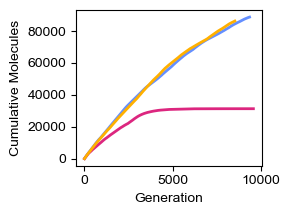

In [21]:
newmols_plot('CathelicidinBF', 'CirculinD', order=['0', '1', '2'])

Circulin D

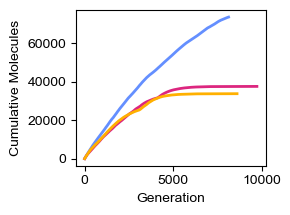

In [22]:
newmols_plot('CirculinD', 'CathelicidinBF', order=['0', '1', '2'])

#### MXFP

In [23]:
def newmols_plot_mxfp(query, c1='#648FFF', c2='#DC267F', c3='#FFB000'): 
    csv_files = [filename for filename in os.listdir('results/') if f'{query}_MXFP' in filename and filename.endswith('.csv')]
    csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[3].split('.')[0]))

    # Read data
    df = pd.DataFrame()
    for i, csv_file in enumerate(csv_files):
        df_run = pd.read_csv(f'results/{csv_file}')
        df_run['run'] = i
        df = pd.concat([df, df_run])

    df['generation'] = df['generation'] + 1
    df['generation'].fillna(0, inplace=True)

    df_run0 = df[df['run'] == 0]
    df_run1 = df[df['run'] == 1]
    df_run2 = df[df['run'] == 2]

    # Group by generation and count molecules
    run0_counts = df_run0.groupby('generation').size()
    run1_counts = df_run1.groupby('generation').size()
    run2_counts = df_run2.groupby('generation').size()

    # Calculate cumulative counts
    run0_cumulative_counts = run0_counts.cumsum()
    run1_cumulative_counts = run1_counts.cumsum()
    run2_cumulative_counts = run2_counts.cumsum()

    # Plot data
    fig, ax = plt.subplots(figsize=(3, 2.25))

    ax.plot(run0_cumulative_counts.index, run0_cumulative_counts.values, label='Run 1', color=c1, linewidth=2)
    ax.plot(run1_cumulative_counts.index, run1_cumulative_counts.values, label='Run 2', color=c2, linewidth=2)
    ax.plot(run2_cumulative_counts.index, run2_cumulative_counts.values, label='Run 3', color=c3, linewidth=2)

    ax.set_xlabel('Generation')
    ax.set_ylabel('Cumulative Molecules')

    plt.tight_layout()
    plt.savefig(f'plots/{query}_newmols_cumulative.png', dpi=1200, bbox_inches='tight')

Cyclosporin

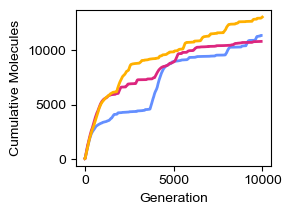

In [24]:
newmols_plot_mxfp('Cyclosporin')

Valinomycin

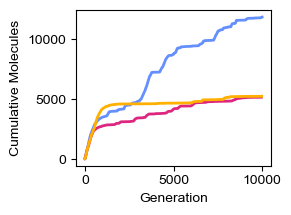

In [25]:
newmols_plot_mxfp('Valinomycin')

#### Duplicates in parallel runs

Polymyxin Random + Self

/home/markus/miniconda3/envs/pdga2/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/markus/miniconda3/envs/pdga2/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


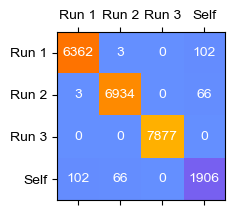

In [52]:
df_run0 = pd.read_csv('results/20240131_PolymyxinB2_MAP4_1.csv')
df_run1 = pd.read_csv('results/20240131_PolymyxinB2_MAP4_2.csv')
df_run2 = pd.read_csv('results/20240131_PolymyxinB2_MAP4_0.csv')
df_self = pd.read_csv('results/20240523_PolymyxinB2_PolymyxinB2_MAP4_0.csv')

df_run0 = df_run0.dropna()
df_run1 = df_run1.dropna()
df_run2 = df_run2.dropna()
df_self = df_self.dropna()

df_run0 = df_run0['smiles']
df_run1 = df_run1['smiles']
df_run2 = df_run2['smiles']
df_self = df_self['smiles']

smiles_sets = [set(df_run0), set(df_run1), set(df_run2), set(df_self)]
overlap_matrix = [[0] * len(smiles_sets) for _ in range(len(smiles_sets))]

for i in range(len(smiles_sets)):
    for j in range(len(smiles_sets)):
        overlap_matrix[i][j] = len(smiles_sets[i] & smiles_sets[j])

overlap_df = pd.DataFrame(overlap_matrix, index=['Run 1', 'Run 2', 'Run 3', 'Self'], columns=['Run 1', 'Run 2', 'Run 3', 'Self'])

# Heatmap
fig, ax = plt.subplots(figsize=(5, 2.25))

colors = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
cmap = LinearSegmentedColormap.from_list('ibm_cb', colors)

ax.matshow(overlap_df, cmap=cmap)
for i in range(4):
    for j in range(4):
        ax.text(j, i, overlap_matrix[i][j], ha='center', va='center', color='white')

ax.set_xticklabels([''] + ['Run 1', 'Run 2', 'Run 3', 'Self'])
ax.set_yticklabels([''] + ['Run 1', 'Run 2', 'Run 3', 'Self'])

plt.tight_layout()
plt.savefig(f'plots/PolymyxinB2_PolymyxinB2_randself_heatmap.png', dpi=1200, bbox_inches='tight')

#### Jaccard and Levenshtein analysis

In [37]:
def levenshtein_distance(seq1, seq2):
    blocks1 = seq1.split('-')
    blocks2 = seq2.split('-')
    len1 = len(blocks1)
    len2 = len(blocks2)

    dp = [[0] * (len2 + 1) for _ in range(len1 + 1)]
    
    for i in range(len1 + 1):
        dp[i][0] = i
    for j in range(len2 + 1):
        dp[0][j] = j
    
    for i in range(1, len1 + 1):
        for j in range(1, len2 + 1):
            if blocks1[i - 1] == blocks2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1]) + 1
    
    if "c" in seq1 and "c" in seq2:
        return dp[len1][len2]
    elif "c" in seq1 and "c" not in seq2:
        return dp[len1][len2] - 1
    elif "c" not in seq1 and "c" in seq2:
        return dp[len1][len2] - 1
    else:
        return dp[len1][len2]

Import data

In [38]:
df_run0 = pd.read_csv('results/20240131_PolymyxinB2_MAP4_1.csv')
df_run1 = pd.read_csv('results/20240131_PolymyxinB2_MAP4_2.csv')
df_run2 = pd.read_csv('results/20240131_PolymyxinB2_MAP4_0.csv')
df_self = pd.read_csv('results/20240523_PolymyxinB2_PolymyxinB2_MAP4_0.csv')

df_run0 = df_run0.dropna()
df_run1 = df_run1.dropna()
df_run2 = df_run2.dropna()
df_self = df_self.dropna()

df_run0 = df_run0[df_run0['dist'] < 0.5]
df_run1 = df_run1[df_run1['dist'] < 0.5]
df_run2 = df_run2[df_run2['dist'] < 0.5]
df_self = df_self[df_self['dist'] < 0.5]

polymyxin_sequence = 'T011-BB045-BB012-BB045-b000-BB045-BB030-BB003-BB045-BB045-BB012'

df_run0['levenshtein'] = df_run0['sequence'].apply(lambda x: levenshtein_distance(x, polymyxin_sequence))
df_run1['levenshtein'] = df_run1['sequence'].apply(lambda x: levenshtein_distance(x, polymyxin_sequence))
df_run2['levenshtein'] = df_run2['sequence'].apply(lambda x: levenshtein_distance(x, polymyxin_sequence))
df_self['levenshtein'] = df_self['sequence'].apply(lambda x: levenshtein_distance(x, polymyxin_sequence))

Levenshtein plot

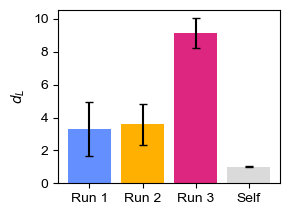

In [39]:
fig, ax = plt.subplots(figsize=(3, 2.25))

ax.bar(0, df_run0['levenshtein'].mean(), yerr=df_run0['levenshtein'].std(), color='#648FFF', label='Run 1', capsize=3)
ax.bar(1, df_run1['levenshtein'].mean(), yerr=df_run1['levenshtein'].std(), color='#FFB000', label='Run 2', capsize=3)
ax.bar(2, df_run2['levenshtein'].mean(), yerr=df_run2['levenshtein'].std(), color='#DC267F', label='Run 3', capsize=3)
ax.bar(3, df_self['levenshtein'].mean(), yerr=df_self['levenshtein'].std(), color='#DADADA', label='Self', capsize=3)

ax.set_xticks(range(4))
ax.set_xticklabels(['Run 1', 'Run 2', 'Run 3', 'Self'])
ax.set_ylabel('$d_L$')

plt.tight_layout()
plt.savefig(f'plots/PolymyxinB2_randself_levenshtein.png', dpi=1200, bbox_inches='tight')

Jaccard plot

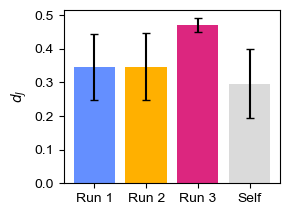

In [40]:
fig, ax = plt.subplots(figsize=(3, 2.25))

ax.bar(0, df_run0['dist'].mean(), yerr=df_run0['dist'].std(), color='#648FFF', label='Run 1', capsize=3)
ax.bar(1, df_run1['dist'].mean(), yerr=df_run1['dist'].std(), color='#FFB000', label='Run 2', capsize=3)
ax.bar(2, df_run2['dist'].mean(), yerr=df_run2['dist'].std(), color='#DC267F', label='Run 3', capsize=3)
ax.bar(3, df_self['dist'].mean(), yerr=df_self['dist'].std(), color='#DADADA', label='Self', capsize=3)

ax.set_xticks(range(4))
ax.set_xticklabels(['Run 1', 'Run 2', 'Run 3', 'Self'])
ax.set_ylabel('$d_J$')

plt.tight_layout()
plt.savefig(f'plots/PolymyxinB2_randself_jaccard.png', dpi=1200, bbox_inches='tight')

#### Sample EB9 to Oncocin run

Read file

In [ ]:
eb9_to_oncocin = pd.read_csv('results/20240206_EB9_Oncocin_MAP4_0.csv')
eb9_to_oncocin = eb9_to_oncocin.sort_values(by=['generation', 'dist'])

oncocin_to_eb9 = pd.read_csv('results/20240206_Oncocin_EB9_MAP4_0.csv')
oncocin_to_eb9 = oncocin_to_eb9.sort_values(by=['generation', 'dist'])

eb9oncocin = pd.read_csv('results/20240503_EB9Oncocin_MAP4_COMBO_0.csv')
eb9oncocin = eb9oncocin.sort_values(by=['generation', 'dist'])

Sample for the best sequence at each generation

In [ ]:
eb9_to_oncocin_best = eb9_to_oncocin.groupby('generation').head(1)
eb9_to_oncocin_best = eb9_to_oncocin_best.head(-4)
eb9_to_oncocin_best = eb9_to_oncocin_best[['smiles', 'generation']]

oncocin_to_eb9_best = oncocin_to_eb9.groupby('generation').head(1)
oncocin_to_eb9_best = oncocin_to_eb9_best.head(-4)
oncocin_to_eb9_best = oncocin_to_eb9_best[['smiles', 'generation']]

eb9oncocin_best = eb9oncocin.groupby('generation').head(1)
eb9oncocin_best = eb9oncocin_best.head(-4)
eb9oncocin_best = eb9oncocin_best[['smiles', 'generation']]

Replace best of generation 0 with polymyxin B2

In [ ]:
eb9_smiles = 'N[C@@H](CCCC[NH3+])C(=O)N(CCCC[NH3+])CC(=O)N[C@@H](CC(C)C)C(=O)N(CC(C)C)CC(=O)N[C@@H](CCCC[NH3+])C(=O)N(CC(C)C)CC(=O)N[C@@H](CC(C)C)C(=O)N(CCCC[NH3+])CC(=O)N[C@@H](CC(C)C)C(=O)N(CC(C)C)CC(=O)N[C@@H](CC(C)C)C(=O)O'
eb9_to_oncocin_best['smiles'].iloc[0] = eb9_smiles

oncocin_smiles = 'N[C@@H](CCCNC(N)=N)C(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CC1=CC=C(O)C=C1)C(=O)N[C@@H]([C@@H](C)CC)C(=O)N[C@@H](CCCNC(N)=N)C(=O)N[C@@H](CCCNC(N)=N)C(=O)N1CCC[C@@H]1C(=O)N1CCC[C@@H]1C(=O)N[C@@H](CCCNC(N)=N)C(=O)N1CCC[C@@H]1C(=O)N[C@@H](CCCNC(N)=N)C(=O)N1CCC[C@@H]1C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC1=CC=C(O)C=C1)C(=O)N1CCC[C@@H]1C(=O)N1CCC[C@@H]1C(=O)N[C@@H](CCCC[NH3+])C(=O)N[C@@H](CC(O)=O)C(=O)N[C@@H](C(C)C)C(=O)O'
oncocin_to_eb9_best['smiles'].iloc[0] = oncocin_smiles

Calculate MAP4C fingerprints

In [ ]:
eb9_to_oncocin_best['map4c'] = eb9_to_oncocin_best['smiles'].progress_apply(lambda x: mapchiral.encode(Chem.MolFromSmiles(x), max_radius=2, n_permutations=2048))
oncocin_to_eb9_best['map4c'] = oncocin_to_eb9_best['smiles'].progress_apply(lambda x: mapchiral.encode(Chem.MolFromSmiles(x), max_radius=2, n_permutations=2048))
eb9oncocin_best['map4c'] = eb9oncocin_best['smiles'].progress_apply(lambda x: mapchiral.encode(Chem.MolFromSmiles(x), max_radius=2, n_permutations=2048))

Determine distances towards EB9 and oncocin

In [ ]:
eb9_to_oncocin_best['dist_eb9'] = eb9_to_oncocin_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, eb9_to_oncocin_best['map4c'].iloc[0]))
eb9_to_oncocin_best['dist_oncocin'] = eb9_to_oncocin_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, eb9_to_oncocin_best['map4c'].iloc[-1]))

oncocin_to_eb9_best['dist_oncocin'] = oncocin_to_eb9_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, oncocin_to_eb9_best['map4c'].iloc[0]))
oncocin_to_eb9_best['dist_eb9'] = oncocin_to_eb9_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, oncocin_to_eb9_best['map4c'].iloc[-1]))

eb9oncocin_best['dist_eb9'] = eb9oncocin_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, eb9_to_oncocin_best['map4c'].iloc[0]))
eb9oncocin_best['dist_oncocin'] = eb9oncocin_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, oncocin_to_eb9_best['map4c'].iloc[0]))

Pareto Plot

In [ ]:
eb9_to_oncocin_best['set'], eb9_to_oncocin_best['color'] = 'EB9 -> Oncocin', '#648FFF'
oncocin_to_eb9_best['set'], oncocin_to_eb9_best['color'] = 'Oncocin -> EB9', '#DC267F'
eb9oncocin_best['set'], eb9oncocin_best['color'] = 'EB9 + Oncocin', '#FFB000'

eb9_oncocin = pd.concat([eb9_to_oncocin_best, oncocin_to_eb9_best, eb9oncocin_best])
eb9_oncocin = eb9_oncocin.sample(frac=1, random_state=0).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(3, 2.25))
ax.scatter(eb9_oncocin['dist_eb9'], eb9_oncocin['dist_oncocin'], c=eb9_oncocin['color'], s=1)

ax.set_xlabel('$d_J$ EB9')
ax.set_ylabel('$d_J$ Oncocin')

# Add legend 
for set_name, color in zip(eb9_oncocin['set'].unique(), eb9_oncocin['color'].unique()):
    ax.scatter([], [], c=color, label=set_name)

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('plots/Oncocin_EB9_MAP4_pareto.png', dpi=1200, bbox_inches='tight')

#### Sample Polymyxin B2 to Gramicidin S run 

Read file

In [ ]:
polymyxin_to_gramicidin = pd.read_csv('results/20240206_PolymyxinB2_GramicidinS_MAP4_2.csv')
gramicidin_to_polymyxin = pd.read_csv('results/20240206_GramicidinS_PolymyxinB2_MAP4_0.csv')

csv_files = [filename for filename in os.listdir('results/') if f'GramicidinPolymyxin_MAP4_COMBO' in filename and filename.endswith('.csv')]
csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[4].split('.')[0]))
gramicidinpolymyxin = pd.DataFrame()
for i, csv_file in enumerate(csv_files):
    df_run = pd.read_csv(f'results/{csv_file}')
    df_run['run'] = i
    gramicidinpolymyxin = pd.concat([gramicidinpolymyxin, df_run])

polymyxin_to_gramicidin = polymyxin_to_gramicidin.sort_values(by=['generation', 'dist'])
gramicidin_to_polymyxin = gramicidin_to_polymyxin.sort_values(by=['generation', 'dist'])
gramicidinpolymyxin = gramicidinpolymyxin.sort_values(by=['generation', 'dist'])

Sample for the best sequence at each generation

In [ ]:
polymyxin_to_gramicidin_best = polymyxin_to_gramicidin.groupby('generation').head(1)
polymyxin_to_gramicidin_best = polymyxin_to_gramicidin_best.head(-4)
polymyxin_to_gramicidin_best = polymyxin_to_gramicidin_best[['smiles', 'generation']]

gramicidin_to_polymyxin_best = gramicidin_to_polymyxin.groupby('generation').head(1)
gramicidin_to_polymyxin_best = gramicidin_to_polymyxin_best.head(-4)
gramicidin_to_polymyxin_best = gramicidin_to_polymyxin_best[['smiles', 'generation']]

gramicidinpolymyxin_best = gramicidinpolymyxin.groupby('generation').head(1)
gramicidinpolymyxin_best = gramicidinpolymyxin_best.head(-4)
gramicidinpolymyxin_best = gramicidinpolymyxin_best[['smiles', 'generation', 'run']]

Replace best of generation 0 with polymyxin B2

In [ ]:
polymyxin_smiles = 'CC(C)CCCCC(=O)N[C@@H](CC[NH3+])C(=O)N[C@@H]([C@H](C)O)C(=O)N[C@@H](CC[NH3+])C(=O)N[C@@H](CCN8)C(=O)N[C@@H](CC[NH3+])C(=O)N[C@H](CC1=CC=CC=C1)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC[NH3+])C(=O)N[C@@H](CC[NH3+])C(=O)N[C@@H]([C@H](C)O)C(=O)8'
polymyxin_to_gramicidin_best['smiles'].iloc[0] = polymyxin_smiles

gramicidin_smiles = 'N8[C@@H](CC(C)C)C(=O)N[C@H](CC1=CC=CC=C1)C(=O)N1CCC[C@@H]1C(=O)N[C@@H](C(C)C)C(=O)N[C@@H](CCC[NH3+])C(=O)N[C@@H](CC(C)C)C(=O)N[C@H](CC1=CC=CC=C1)C(=O)N1CCC[C@@H]1C(=O)N[C@@H](C(C)C)C(=O)N[C@@H](CCC[NH3+])C(=O)8'
gramicidin_to_polymyxin_best['smiles'].iloc[0] = gramicidin_smiles

Calculate MAP4C fingerprints

In [ ]:
polymyxin_to_gramicidin_best['map4c'] = polymyxin_to_gramicidin_best['smiles'].apply(lambda x: mapchiral.encode(Chem.MolFromSmiles(x), max_radius=2, n_permutations=2048))
gramicidin_to_polymyxin_best['map4c'] = gramicidin_to_polymyxin_best['smiles'].apply(lambda x: mapchiral.encode(Chem.MolFromSmiles(x), max_radius=2, n_permutations=2048))
gramicidinpolymyxin_best['map4c'] = gramicidinpolymyxin_best['smiles'].apply(lambda x: mapchiral.encode(Chem.MolFromSmiles(x), max_radius=2, n_permutations=2048))

Determine distances towards polymyxin B2 and gramicidin S

In [ ]:
polymyxin_to_gramicidin_best['dist_polymyxin'] = polymyxin_to_gramicidin_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, polymyxin_to_gramicidin_best['map4c'].iloc[0]))
polymyxin_to_gramicidin_best['dist_gramicidin'] = polymyxin_to_gramicidin_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, polymyxin_to_gramicidin_best['map4c'].iloc[-1]))

gramicidin_to_polymyxin_best['dist_gramicidin'] = gramicidin_to_polymyxin_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, gramicidin_to_polymyxin_best['map4c'].iloc[0]))
gramicidin_to_polymyxin_best['dist_polymyxin'] = gramicidin_to_polymyxin_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, gramicidin_to_polymyxin_best['map4c'].iloc[-1]))

gramicidinpolymyxin_best['dist_polymyxin'] = gramicidinpolymyxin_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, polymyxin_to_gramicidin_best['map4c'].iloc[0]))
gramicidinpolymyxin_best['dist_gramicidin'] = gramicidinpolymyxin_best['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, gramicidin_to_polymyxin_best['map4c'].iloc[0]))

Pareto plot

In [ ]:
csv_files = [filename for filename in os.listdir('results/') if f'PolymyxinB2_GramicidinS_MAP4' in filename and filename.endswith('.csv')]
csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[4].split('.')[0]))
polymyxin_to_gramicidin = pd.DataFrame()
for i, csv_file in enumerate(csv_files):
    df_run = pd.read_csv(f'results/{csv_file}')
    df_run['run'] = i
    polymyxin_to_gramicidin = pd.concat([polymyxin_to_gramicidin, df_run])

csv_files = [filename for filename in os.listdir('results/') if f'GramicidinS_PolymyxinB2_MAP4' in filename and filename.endswith('.csv')]
csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[4].split('.')[0]))
gramicidin_to_polymyxin = pd.DataFrame()
for i, csv_file in enumerate(csv_files):
    df_run = pd.read_csv(f'results/{csv_file}')
    df_run['run'] = i
    gramicidin_to_polymyxin = pd.concat([gramicidin_to_polymyxin, df_run])

csv_files = [filename for filename in os.listdir('results/') if f'GramicidinPolymyxin_MAP4_COMBO' in filename and filename.endswith('.csv')]
csv_files = sorted(csv_files, key=lambda x: int(x.split('_')[4].split('.')[0]))
gramicidinpolymyxin = pd.DataFrame()
for i, csv_file in enumerate(csv_files):
    df_run = pd.read_csv(f'results/{csv_file}')
    df_run['run'] = i
    gramicidinpolymyxin = pd.concat([gramicidinpolymyxin, df_run])

polymyxin_to_gramicidin = polymyxin_to_gramicidin.sort_values(by=['generation', 'dist'])
gramicidin_to_polymyxin = gramicidin_to_polymyxin.sort_values(by=['generation', 'dist'])
gramicidinpolymyxin = gramicidinpolymyxin.sort_values(by=['generation', 'dist'])

polymyxin_to_gramicidin_best = polymyxin_to_gramicidin.groupby('generation').head(1)
polymyxin_to_gramicidin_best = polymyxin_to_gramicidin_best.head(-4)
polymyxin_to_gramicidin_best = polymyxin_to_gramicidin_best[['smiles', 'generation', 'run']]

gramicidin_to_polymyxin_best = gramicidin_to_polymyxin.groupby('generation').head(1)
gramicidin_to_polymyxin_best = gramicidin_to_polymyxin_best.head(-4)
gramicidin_to_polymyxin_best = gramicidin_to_polymyxin_best[['smiles', 'generation', 'run']]

gramicidinpolymyxin_best = gramicidinpolymyxin.groupby('generation').head(1)
gramicidinpolymyxin_best = gramicidinpolymyxin_best.head(-4)
gramicidinpolymyxin_best = gramicidinpolymyxin_best[['smiles', 'generation', 'run']]

polymyxin_smiles = 'CC(C)CCCCC(=O)N[C@@H](CC[NH3+])C(=O)N[C@@H]([C@H](C)O)C(=O)N[C@@H](CC[NH3+])C(=O)N[C@@H](CCN8)C(=O)N[C@@H](CC[NH3+])C(=O)N[C@H](CC1=CC=CC=C1)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC[NH3+])C(=O)N[C@@H](CC[NH3+])C(=O)N[C@@H]([C@H](C)O)C(=O)8'
polymyxin_map4c = mapchiral.encode(Chem.MolFromSmiles(polymyxin_smiles), max_radius=2, n_permutations=2048)
polymyxin_to_gramicidin_best['smiles'].iloc[0] = polymyxin_smiles

gramicidin_smiles = 'N8[C@@H](CC(C)C)C(=O)N[C@H](CC1=CC=CC=C1)C(=O)N1CCC[C@@H]1C(=O)N[C@@H](C(C)C)C(=O)N[C@@H](CCC[NH3+])C(=O)N[C@@H](CC(C)C)C(=O)N[C@H](CC1=CC=CC=C1)C(=O)N1CCC[C@@H]1C(=O)N[C@@H](C(C)C)C(=O)N[C@@H](CCC[NH3+])C(=O)8'
gramicidin_map4c = mapchiral.encode(Chem.MolFromSmiles(gramicidin_smiles), max_radius=2, n_permutations=2048)
gramicidin_to_polymyxin_best['smiles'].iloc[0] = gramicidin_smiles

polymyxin_to_gramicidin_best['map4c'] = polymyxin_to_gramicidin_best['smiles'].apply(lambda x: mapchiral.encode(Chem.MolFromSmiles(x), max_radius=2, n_permutations=2048))
gramicidin_to_polymyxin_best['map4c'] = gramicidin_to_polymyxin_best['smiles'].apply(lambda x: mapchiral.encode(Chem.MolFromSmiles(x), max_radius=2, n_permutations=2048))
gramicidinpolymyxin_best['map4c'] = gramicidinpolymyxin_best['smiles'].apply(lambda x: mapchiral.encode(Chem.MolFromSmiles(x), max_radius=2, n_permutations=2048))

polymyxin_to_gramicidin_best['set'], polymyxin_to_gramicidin_best['color'] = ' Polymyxin B2 -> Gramicidin S', '#648FFF'
gramicidin_to_polymyxin_best['set'], gramicidin_to_polymyxin_best['color'] = 'Gramicidin S -> Polymyxin B2', '#DC267F'
gramicidinpolymyxin_best['set'], gramicidinpolymyxin_best['color'] = 'Polymyxin B2 + Gramicidin S', '#FFB000'

polymyxin_gramicidin = pd.concat([polymyxin_to_gramicidin_best, gramicidin_to_polymyxin_best, gramicidinpolymyxin_best])
polymyxin_gramicidin['dist_polymyxin'] = polymyxin_gramicidin['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, polymyxin_map4c))
polymyxin_gramicidin['dist_gramicidin'] = polymyxin_gramicidin['map4c'].apply(lambda x: 1 - mapchiral.jaccard_similarity(x, gramicidin_map4c))

polymyxin_gramicidin = polymyxin_gramicidin.sample(frac=1, random_state=0).reset_index(drop=True)
polymyxin_gramicidin = polymyxin_gramicidin.sort_values(by='generation')
polymyxin_gramicidin.drop_duplicates(subset='smiles', inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2.25))
ax.scatter(polymyxin_gramicidin['dist_polymyxin'], polymyxin_gramicidin['dist_gramicidin'], c=polymyxin_gramicidin['color'], s=1)

ax.set_xlabel('$d_J$ Polymyxin B2')
ax.set_ylabel('$d_J$ Gramicidin S')

# Add legend 
for set_name, color in zip(polymyxin_gramicidin['set'].unique(), polymyxin_gramicidin['color'].unique()):
    ax.scatter([], [], c=color, label=set_name)

plt.savefig('plots/GramicidinS_PolymyxinB2_MAP4_pareto.png', dpi=1200, bbox_inches='tight')